In [1]:
from scipy.optimize import fsolve
import numpy as np
from scipy.integrate import  odeint
import matplotlib.pyplot as plt

In [2]:
def k_calc(Funcs,Ysolni,h,ti,N):
    
    vk1=fsolve( lambda _k1: [_k1[_n]-Funcs[_n](Ysolni+h*_k1,ti+h) for _n in np.arange(N)] ,Ysolni )
    vk2=fsolve( lambda _k2: [_k2[_n]-Funcs[_n](Ysolni+h*(_k2-vk1),ti) for _n in np.arange(N)] ,Ysolni )
    
    
    return vk1,vk2

def sdirk_212(Funcs,y0,t0,t1,rel_err0=1.e-3,err0=1.e-3,h=1.e-3,hmin=1.e-4,hmax=5.e-1,Nmax=5000,beta=.05):
    
    try:
        N=len(Funcs)
    except:
        Funcs=[Funcs]
        N=1
    Ysol=np.array([y0])
    tsteps=np.array([t0])
    tnext=t0
    
    n=0
    hnew=h
    while n<Nmax and tsteps[n]<t1:

        while True:
            k1,k2= k_calc(Funcs,Ysol[n],hnew,tsteps[n],N)
            ynext1 = Ysol[n]+hnew*k1
            ynext2 = Ysol[n]+hnew/2*(k1+k2)
            delta=ynext1-ynext2
            err=np.sqrt(np.dot(delta,delta)  )
            delta=(ynext1-ynext2)/ynext2
            rel_err=np.sqrt(np.dot(delta,delta)  )
            
            if (err>err0 or rel_err> rel_err0) and (hnew<hmax and hnew>hmin) :
                hnew*=beta*(err0/err)
            else:
                hnew*=beta*(err0/err)**(0.5)
                break
                
        if hnew>hmax:    
            hnew=hmax
            
        if hnew<hmin:
            hnew=hmin
        
        
        ynext1 = Ysol[n]+hnew*k1
        ynext2 = Ysol[n]+hnew/2*(k1+k2)
        Ysol=np.vstack((Ysol[:],ynext2))
        tsteps=np.append(tsteps,tsteps[n]+hnew)
        
        
        n+=1
    return tsteps, Ysol
    
    

In [3]:
def dydt1(r,t):
    x=r[0]
    y=r[1]
    z=r[2]
    return x

def dydt2(r,t):
    x=r[0]
    y=r[1]
    z=r[2]
    return -y

def dydt3(r,t):
    x=r[0]
    y=r[1]
    z=r[2]
    return (x+y+z)

In [4]:
x0,y0,z0=1,1,1

%time t,y=sdirk_212([dydt1,dydt2,dydt3],[x0,y0,z0],0,1,rel_err0=1.e-3,err0=1.e-3,h=1.e-3,hmin=1.e-4,hmax=5.e-1,Nmax=5000,beta=.1)


%time yf=odeint(lambda _r,_t:([dydt1(_r,_t),dydt2(_r,_t),dydt3(_r,_t)]) ,[x0,y0,z0],t,mxstep=5000,atol=1.e-7,rtol=1.e-7)



rel_er1= np.array([np.abs((y[i,0]-yf[i,0])/yf[i,0]) for i in np.arange(len(t))  ])
rel_er2= np.array([np.abs((y[i,1]-yf[i,1])/yf[i,1]) for i in np.arange(len(t))  ])
rel_er3= np.array([np.abs((y[i,2]-yf[i,2])/yf[i,2]) for i in np.arange(len(t))  ])

CPU times: user 296 ms, sys: 0 ns, total: 296 ms
Wall time: 298 ms
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 342 µs


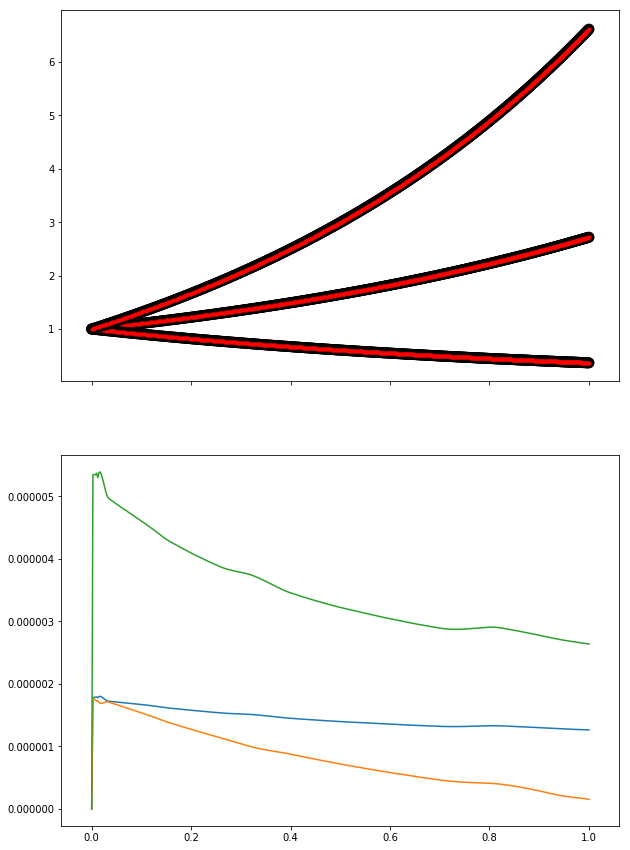

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=1,sharex=True,figsize=(10, 15))
m_size=((t+1)/(t+1))*100

ax[0].scatter(t,y[:,0],color='black',marker='o',s=m_size)
ax[0].scatter(t,yf[:,0],color='r',marker='.')

ax[0].scatter(t,y[:,1],color='black',marker='o',s=m_size)
ax[0].scatter(t,yf[:,1],color='r',marker='.')

ax[0].scatter(t,y[:,2],color='black',marker='o',s=m_size)
ax[0].scatter(t,yf[:,2],color='r',marker='.')

ax[1].plot(t,rel_er1)
ax[1].plot(t,rel_er2)
ax[1].plot(t,rel_er3)

plt.show();


In [6]:
def dxdt(r,t):
    x=r[0]
    y=r[1]
    return np.sin((y+x)**4)*y*t**2

def dydt(r,t):
    x=r[0]
    y=r[1]
    return np.sin((x-y**2))*x

In [7]:
x0,y0=0.3,0.2

%time t,y=sdirk_212([dxdt,dydt],[x0,y0],0,30,rel_err0=1.e-3,err0=1.e-3,h=1.e-1,hmin=1.e-5,hmax=5.e-1,Nmax=5000,beta=0.3)


%time yf=odeint(lambda _r,_t:([dxdt(_r,_t),dydt(_r,_t)]) ,[x0,y0],t,mxstep=5000,atol=1.e-7,rtol=1.e-7)



rel_er1= np.array([np.abs((y[i,0]-yf[i,0])/yf[i,0]) for i in np.arange(len(t))  ])
rel_er2= np.array([np.abs((y[i,1]-yf[i,1])/yf[i,1]) for i in np.arange(len(t))  ])


/home/dimitronic/anaconda2/lib/python2.7/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/home/dimitronic/anaconda2/lib/python2.7/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


CPU times: user 700 ms, sys: 8 ms, total: 708 ms
Wall time: 704 ms
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 5.72 ms


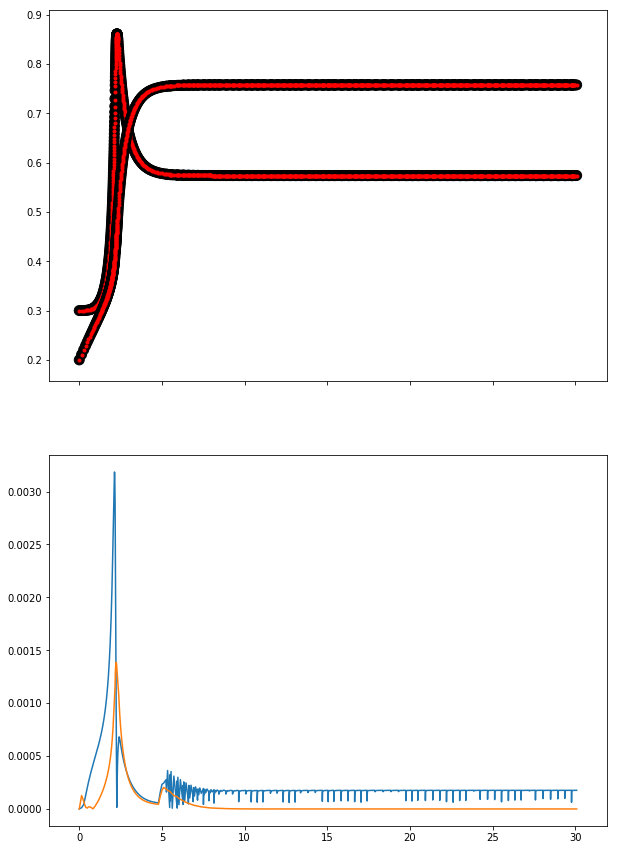

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=1,sharex=True,figsize=(10, 15))

m_size=((t+1)/(t+1))*100

ax[0].scatter(t,y[:,0],color='black',marker='o',s=m_size)
ax[0].scatter(t,yf[:,0],color='r',marker='.')

ax[0].scatter(t,y[:,1],color='black',marker='o',s=m_size)
ax[0].scatter(t,yf[:,1],color='r',marker='.')


ax[1].plot(t,rel_er1)
ax[1].plot(t,rel_er2)

plt.show();

In [9]:
def dxdt(r,t):
    x=r[0]
    return (np.sin(5*t**2)+np.cos(x))*3

In [10]:
x0=1

%time t,y=sdirk_212(dxdt,x0,0.,5,rel_err0=1.e-3,err0=1.e-3,h=1.e-3,hmin=1.e-5,hmax=1.e-1,Nmax=5000,beta=0.05)
%time yf=odeint(lambda _r,_t:dxdt([_r],_t) ,x0,t,mxstep=5000,atol=1.e-7,rtol=1.e-7)



rel_er1= np.array([np.abs((y[i]-yf[i])/yf[i]) for i in np.arange(len(t))  ])



CPU times: user 1.8 s, sys: 0 ns, total: 1.8 s
Wall time: 1.8 s
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 4.22 ms


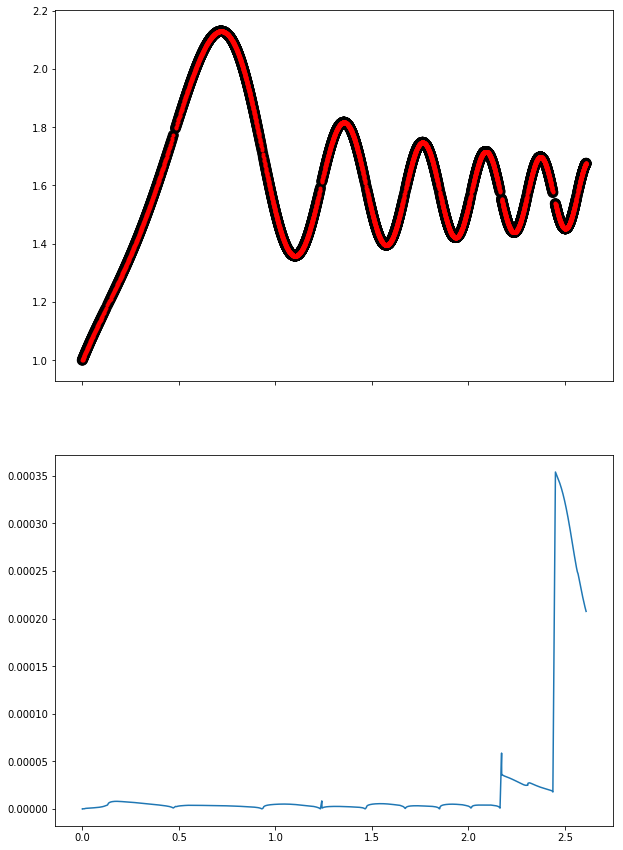

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=1,sharex=True,figsize=(10, 15))

m_size=((t+1)/(t+1))*100

ax[0].scatter(t,y,color='black',marker='o',s=m_size)
ax[0].scatter(t,yf,color='r',marker='.')



ax[1].plot(t,rel_er1)

plt.show();